## Problem statement


- Build a CNN Based multi classifier to detect which type of fruits it is?




In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [6]:
#output layer
classifier.add(Dense(units = 18, activation = 'softmax'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
##Model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [9]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [10]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:\\Users\\SHASHANK\\Desktop\\AI_Fruits_classifer\\Fruit\\training',
                                               target_size=(64, 64),
                                               
                                               class_mode='categorical')

Found 9310 images belonging to 18 classes.


In [12]:
train_set.class_indices

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow': 9,
 'Banana': 10,
 'Banana Red': 11,
 'Tomato 1': 12,
 'Tomato 2': 13,
 'Tomato 3': 14,
 'Tomato 4': 15,
 'Tomato Cherry Red': 16,
 'Tomato Maroon': 17}

In [13]:
#which is differnt types of class?
label_map = (train_set.class_indices)
print(label_map)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Banana': 10, 'Banana Red': 11, 'Tomato 1': 12, 'Tomato 2': 13, 'Tomato 3': 14, 'Tomato 4': 15, 'Tomato Cherry Red': 16, 'Tomato Maroon': 17}


In [14]:
## Importng test data
test_set = test_datagen.flow_from_directory('C:\\Users\\SHASHANK\\Desktop\\AI_Fruits_classifer\\Fruit\\test',
                                            target_size=(64, 64),
                                            
                                            class_mode='categorical')

Found 3119 images belonging to 18 classes.


In [15]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=2,
        validation_data=test_set
        )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/2
291/291 [==============================] - 219s 753ms/step - loss: 0.0765 - accuracy: 0.9719 - val_loss: 0.0135 - val_accuracy: 0.9858
Epoch 2/2
291/291 [==============================] - 218s 750ms/step - loss: 0.0177 - accuracy: 0.9931 - val_loss: 0.0222 - val_accuracy: 0.9911


- Here we can see that we are getting 99.31% accuray on the training dataset and 99.11% accuracy on the testing dataset. which is very nice accuary.

---

In [28]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:\\Users\\SHASHANK\\Desktop\\AI_Fruits_classifer\\Fruit\\inference\\apple.jpg'
                           ,target_size =(64,64))


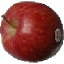

In [29]:
test_image

In [30]:
## Convert image to array
test_image_arr = image.img_to_array(test_image)

In [31]:
test_image_arr

array([[[248., 255., 248.],
        [253., 255., 252.],
        [253., 255., 252.],
        ...,
        [255., 254., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 253.],
        [255., 255., 255.],
        [255., 253., 254.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 253., 254.],
        [255., 253., 254.],
        [255., 253., 254.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [32]:
## For single prediction change the dimension . 

test_image=test_image_arr.reshape(1,64,64,3)

In [33]:
result = classifier.predict(test_image)

In [34]:
result

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 7.720564e-38, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [35]:
result=result.argmax()

In [36]:
result

6

In [37]:
print(label_map)

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Banana': 10, 'Banana Red': 11, 'Tomato 1': 12, 'Tomato 2': 13, 'Tomato 3': 14, 'Tomato 4': 15, 'Tomato Cherry Red': 16, 'Tomato Maroon': 17}


In [38]:
## print label

if result == 0.0:
    prediction = 'Apple Braeburn'
elif result == 1:
    prediction = 'Apple Golden 1'
elif result == 2:
    prediction = "Apple Golden 2"
elif result == 3:
    prediction = "Apple Golden 3"
elif result == 4:
    prediction = "Apple Granny Smith"
elif result == 5:
    prediction = "Apple Red 1"
elif result == 6:
    prediction = "Apple Red 2"
elif result == 7:
    prediction = "Apple Red 3"
elif result == 8:
    prediction = "Apple Red Delicious"
elif result == 9:
    prediction = "Apple Red Yellow"
elif result == 10:
    prediction = "Banana"
elif result == 11:
    prediction = "Banana Red"
elif result == 12:
    prediction = "Tomato 1"
elif result == 13:
    prediction = "Tomato 2"
elif result == 14:
    prediction = "Tomato 3"
elif result == 15:
    prediction = "Tomato 4"
elif result == 16:
    prediction = "Tomato Cherry Red"
else:
    prediction = 'Tomato Maroon'
    

In [39]:
prediction

'Apple Red 2'